In [ ]:
!pip install pyspark py4j

     |████████████████████████████████| 212.4 MB 68 kB/s 
     |████████████████████████████████| 198 kB 60.6 MB/s 
     |████████████████████████████████| 198 kB 54.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=e964ab6663870a0cbb9170f5cbb22f5f0cba3ecdcc671895d2208ff1201ddb22
  Stored in directory: /root/.cache/pip/wheels/a5/0a/c1/9561f6fecb759579a7d863dcd846daaa95f598744e71b02c77
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as f
from pyspark.sql.functions import col, lit, min, max, avg
from pyspark.sql.types import *
import pandas as pd
import seaborn as sb

In [ ]:
#1. Create Session 
spark = SparkSession.builder.appName("PySparkBooks").getOrCreate()

In [ ]:
#2. Load data
data = spark.read.json("books.json")

In [ ]:
#3. Explore data
print(data.printSchema())
print(data.show())
print(data.head())
print(data.count())

root
 |-- author: string (nullable = true)
 |-- edition: string (nullable = true)
 |-- price: double (nullable = true)
 |-- title: string (nullable = true)
 |-- year_written: long (nullable = true)

None
+--------------------+-----------------+-----+--------------------+------------+
|              author|          edition|price|               title|year_written|
+--------------------+-----------------+-----+--------------------+------------+
|        Austen, Jane|          Penguin| 18.2|    Northanger Abbey|        1814|
|        Tolstoy, Leo|          Penguin| 12.7|       War and Peace|        1865|
|        Tolstoy, Leo|          Penguin| 13.5|       Anna Karenina|        1875|
|     Woolf, Virginia|   Harcourt Brace| 25.0|       Mrs. Dalloway|        1925|
|Cunnningham, Michael|   Harcourt Brace|12.35|           The Hours|        1999|
|         Twain, Mark|          Penguin| 5.76|    Huckleberry Finn|        1865|
|    Dickens, Charles|     Random House| 5.75|         Bleak House|

In [ ]:
#data.show()
print(data.select("title", "price").show())

+--------------------+-----+
|               title|price|
+--------------------+-----+
|    Northanger Abbey| 18.2|
|       War and Peace| 12.7|
|       Anna Karenina| 13.5|
|       Mrs. Dalloway| 25.0|
|           The Hours|12.35|
|    Huckleberry Finn| 5.76|
|         Bleak House| 5.75|
|          Tom Sawyer| 7.75|
| A Room of One's Own| 29.0|
|        Harry Potter|19.95|
|One Hundred Years...| 14.0|
|Hamlet, Prince of...| 7.95|
|   Lord of the Rings|27.45|
+--------------------+-----+

None


In [ ]:
# 4. Filter Data
# select * from books where year_written > 1950 AND edition = "Harcourt Brace"
data_filtered = data.filter("year_written > 1950 AND edition = \"Harcourt Brace\"")
data_filtered.show()

+--------------------+--------------+-----+------------+------------+
|              author|       edition|price|       title|year_written|
+--------------------+--------------+-----+------------+------------+
|Cunnningham, Michael|Harcourt Brace|12.35|   The Hours|        1999|
|       Rowling, J.K.|Harcourt Brace|19.95|Harry Potter|        2000|
+--------------------+--------------+-----+------------+------------+



In [ ]:
data_filtered = data.filter("title LIKE \"%Harry%\"")
data_filtered.show()

+-------------+--------------+-----+------------+------------+
|       author|       edition|price|       title|year_written|
+-------------+--------------+-----+------------+------------+
|Rowling, J.K.|Harcourt Brace|19.95|Harry Potter|        2000|
+-------------+--------------+-----+------------+------------+



In [ ]:
maxPrice = data.agg(max("price")).collect()[0][0]
print(maxPrice)
data.select("title", "price").filter(data.price == maxPrice).show()
#data.agg(max("price")).show()

29.0
+-------------------+-----+
|              title|price|
+-------------------+-----+
|A Room of One's Own| 29.0|
+-------------------+-----+

+----------+
|max(price)|
+----------+
|      29.0|
+----------+



In [ ]:
# 5. Stop Session
spark.stop()

In [ ]:
# 1. Start new session
spark = SparkSession.builder.appName("PySparkStock").getOrCreate()

In [ ]:
# 2. Load data
data = spark.read.csv("stocks_price_final.csv", sep = ",", header = True)

In [ ]:
# 3. Explore data
data.printSchema()
print(data.show())

root
 |-- _c0: string (nullable = true)
 |-- symbol: string (nullable = true)
 |-- date: string (nullable = true)
 |-- open: string (nullable = true)
 |-- high: string (nullable = true)
 |-- low: string (nullable = true)
 |-- close: string (nullable = true)
 |-- volume: string (nullable = true)
 |-- adjusted: string (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      date|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|       54|       58|       51|    52.75|7326300|    52.75|    $9.31B|

In [ ]:
data_schema = [
               StructField("_c0", IntegerType(), True),
               StructField("symbol", StringType(), True),
               StructField("Date", DateType(), True),              
               StructField("open", DoubleType(), True),
               StructField("high", DoubleType(), True),
               StructField("low", DoubleType(), True),
               StructField("close", DoubleType(), True),
               StructField("volume", IntegerType(), True),
               StructField("adjusted", DoubleType(), True),
               StructField("market.cap", StringType(), True),
               StructField("sector", StringType(), True),
               StructField("industry", StringType(), True),
               StructField("exchange", StringType(), True)              
              ]

structure = StructType(fields = data_schema)

In [ ]:
data = spark.read.csv("stocks_price_final.csv", sep = ",", header = True, schema =  structure)
print(data.printSchema())

root
 |-- _c0: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- Date: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: integer (nullable = true)
 |-- adjusted: double (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)

None


In [ ]:
data = data.withColumnRenamed("market.cap", "market_cap")
print(data.show())
print(data.dtypes)
print(data.describe().show())
print(data.count()) 
print(data.distinct().count()) 

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      Date|     open|     high|      low|    close| volume| adjusted|market_cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

In [ ]:
print(data.select("open", "high", "low", "close", "volume", "adjusted").describe().show())

+-------+------------------+------------------+------------------+------------------+------------------+------------------+
|summary|              open|              high|               low|             close|            volume|          adjusted|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+
|  count|           1726301|           1726301|           1726301|           1726301|           1725207|           1726301|
|   mean|15070.071703341051| 15555.06726813709|14557.808227578982|15032.714854330707|1397692.1627885813|  14926.1096887955|
| stddev|1111821.8002863196|1148247.1953514954|1072968.1558434265|1109755.9294000647| 5187522.908169119|1101877.6328940107|
|    min|             0.072|             0.078|             0.052|             0.071|                 0|         -1.230099|
|    max|      1.60168176E8|      1.61601456E8|      1.55151728E8|      1.58376592E8|         656504200|      1.57249392E8|
+-------

In [ ]:
print(data.groupBy("sector").count().show())

+--------------------+------+
|              sector| count|
+--------------------+------+
|       Miscellaneous| 50221|
|         Health Care|316175|
|    Public Utilities| 72836|
|              Energy| 87494|
|Consumer Non-Dura...| 78080|
|             Finance|303180|
|    Basic Industries| 97323|
|       Capital Goods|133122|
|          Technology|229799|
|   Consumer Services|272393|
|   Consumer Durables| 48404|
|      Transportation| 40007|
+--------------------+------+

None


In [ ]:
x = data.select("sector", "open", "close", "high", "adjusted")\
    .groupBy("sector")\
    .mean()\
    .collect()

In [ ]:
for row in x:
  print(list(row))

for row in x:
  print(row.asDict())

['Miscellaneous', 52.03839496900624, 52.06362854950968, 52.884631131447506, 51.809730336322794]
['Health Care', 119.96763306523218, 119.07806125419022, 124.45170117143793, 118.97394778016198]
['Public Utilities', 35.580777352394705, 35.58528245861945, 36.015410035847495, 34.7301556850045]
['Energy', 24.456589891261007, 24.427350302158175, 24.880229757560087, 23.684714263001084]
['Consumer Non-Durables', 43.32860274612677, 43.33038601364613, 43.987018467410955, 42.81762456569033]
['Finance', 37.77466706818995, 37.77900231428883, 38.2901740734391, 37.10028522718097]
['Basic Industries', 266410.35470107093, 265750.3613671152, 274987.15639747615, 263865.51070311887]
['Capital Goods', 60.4885436328285, 60.516554835687764, 61.427219387493516, 59.97512253879351]
['Technology', 49.516045118395034, 49.53479888748186, 50.36254671227161, 49.25234033754425]
['Consumer Services', 55.078867342590755, 55.055247536473416, 56.2036338488444, 54.36187827846176]
['Consumer Durables', 391.03153998497794, 3

In [ ]:
data.dropna

<bound method DataFrame.dropna of DataFrame[_c0: int, symbol: string, Date: date, open: double, high: double, low: double, close: double, volume: int, adjusted: double, market_cap: string, sector: string, industry: string, exchange: string]>

In [ ]:
data_pd = data.select("sector", "open", "close", "high", "adjusted")\
          .groupBy("sector")\
          .mean()\
          .toPandas()
data_pd

,sector,avg(open),avg(close),avg(high),avg(adjusted)
0,Miscellaneous,52.038395,52.063629,52.884631,51.809730
1,Health Care,119.967633,119.078061,124.451701,118.973948
2,Public Utilities,35.580777,35.585282,36.015410,34.730156
3,Energy,24.456590,24.427350,24.880230,23.684714
4,Consumer Non-Durables,43.328603,43.330386,43.987018,42.817625
5,Finance,37.774667,37.779002,38.290174,37.100285
6,Basic Industries,266410.354701,265750.361367,274987.156397,263865.510703
7,Capital Goods,60.488544,60.516555,61.427219,59.975123
8,Technology,49.516045,49.534799,50.362547,49.252340
9,Consumer Services,55.078867,55.055248,56.203634,54.361878


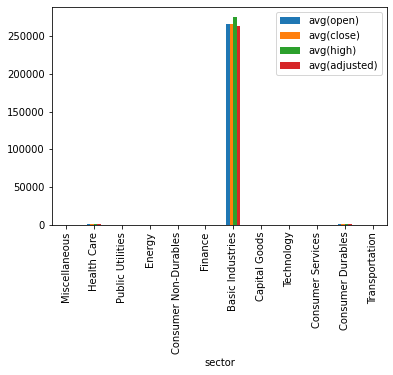

In [ ]:
data_pd.plot(kind = "bar", x = "sector", y = data_pd.columns.tolist()[1:])

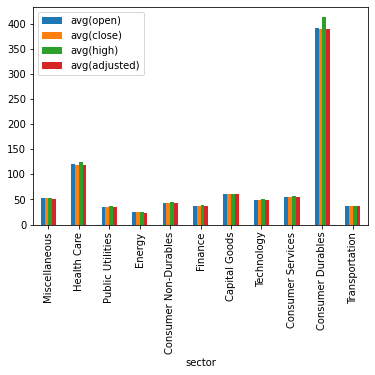

In [ ]:
new = data_pd[(data_pd != "Basic Industries")]
#new = data_pd.drop("Basic Industries")
new = new.dropna()
new.plot(kind = "bar", x = "sector", y = new.columns.tolist()[1:])

In [ ]:
dataI_pd = data.select("industry", "open", "close", "high", "adjusted")\
          .groupBy("industry")\
          .mean()\
          .toPandas()
dataI_pd

,industry,avg(open),avg(close),avg(high),avg(adjusted)
0,Finance/Investors Services,5.134402,5.136631,5.240027,4.991354
1,Miscellaneous,16.385883,16.359879,16.676970,16.148959
2,Investment Bankers/Brokers/Service,58.950581,58.983086,59.786048,58.157837
3,Food Distributors,43.274509,43.273178,43.975241,42.910476
4,Miscellaneous manufacturing industries,15.660586,15.650935,15.922934,15.369819
...,...,...,...,...,...
130,Newspapers/Magazines,37.148455,37.200996,37.608788,36.816791
131,Ordnance And Accessories,39.697790,39.702395,40.414447,38.673986
132,Movies/Entertainment,19.157668,19.123131,19.471490,18.897540
133,Electronics Distribution,6.428699,6.430408,6.611505,6.377569


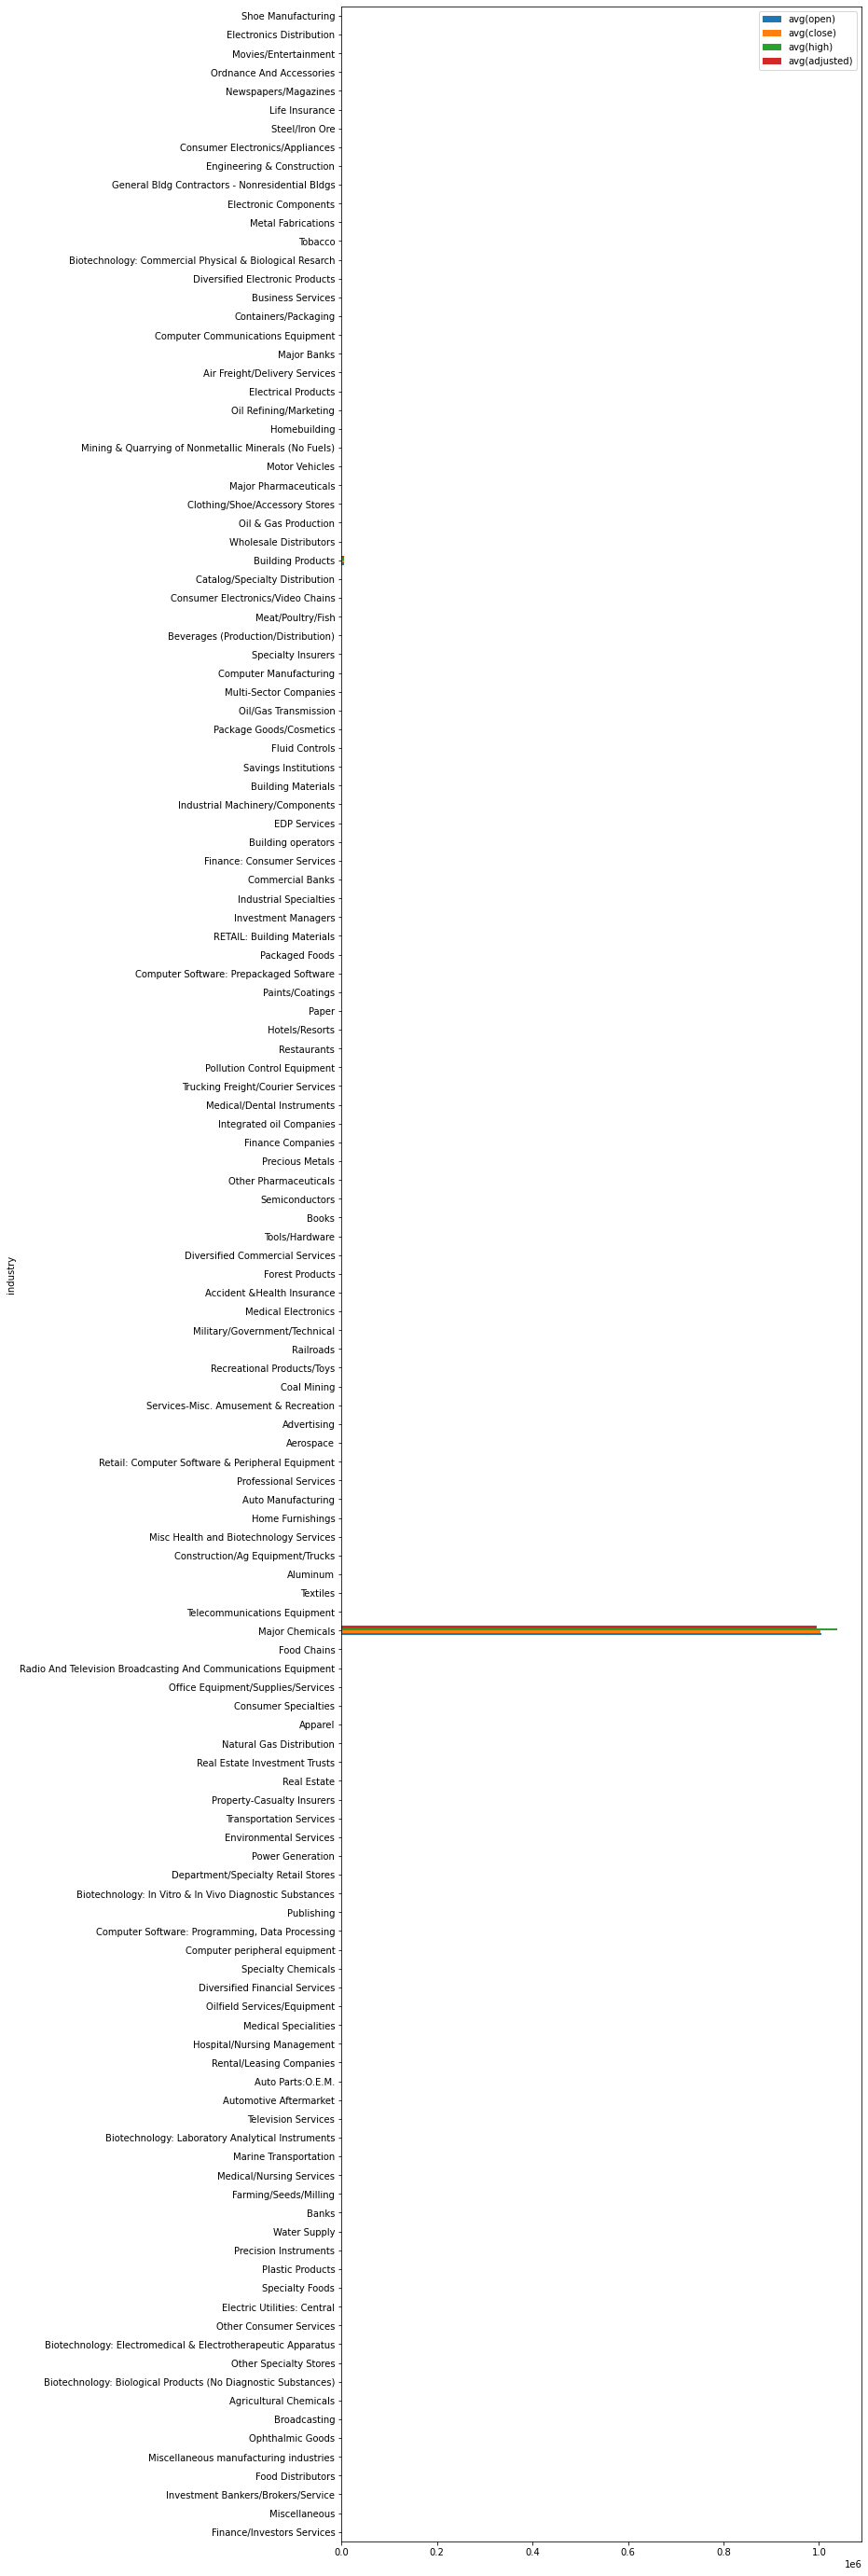

In [ ]:
dataI_pd.plot(kind = "barh", x = "industry", y = dataI_pd.columns.tolist()[1:], figsize=(10,50))

In [ ]:
#dataH = data.filter(f.col("sector") == "Health Care")
dataH = data.filter("sector = \"Health Care\"")
dataH.show()

+---+------+----------+----+----+----+-----+------+--------+----------+-----------+--------------------+--------+
|_c0|symbol|      Date|open|high| low|close|volume|adjusted|market_cap|     sector|            industry|exchange|
+---+------+----------+----+----+----+-----+------+--------+----------+-----------+--------------------+--------+
|218|    YI|2019-01-02|6.02|6.11| 6.0|  6.0|  4100|     6.0|  $560.04M|Health Care|Medical/Nursing S...|  NASDAQ|
|219|    YI|2019-01-03|6.02|6.05|5.95| 6.05|  4700|    6.05|  $560.04M|Health Care|Medical/Nursing S...|  NASDAQ|
|220|    YI|2019-01-04|6.05|6.97|6.05| 6.78| 10300|    6.78|  $560.04M|Health Care|Medical/Nursing S...|  NASDAQ|
|221|    YI|2019-01-07| 6.8| 7.0|6.55|  7.0| 10100|     7.0|  $560.04M|Health Care|Medical/Nursing S...|  NASDAQ|
|222|    YI|2019-01-08| 7.0|9.76| 6.9| 9.55| 60300|    9.55|  $560.04M|Health Care|Medical/Nursing S...|  NASDAQ|
|223|    YI|2019-01-09|9.56|10.8| 9.5| 9.62| 38500|    9.62|  $560.04M|Health Care|Medic

In [ ]:
data.filter("Date >= \"2020-01-01\"") \
    .groupBy("sector") \
    .agg(
        min("Date").alias("From"),
        max("Date").alias("To"),
        min("open").alias("Min Open"),
        max("open").alias("Max Open"),
        avg("open").alias("Avg Open"),
        min("close").alias("Min Close"),
        max("close").alias("Max Close"),
        avg("close").alias("Avg Close")
    ).show()

+--------------------+----------+----------+--------+-----------+------------------+---------+-----------+------------------+
|              sector|      From|        To|Min Open|   Max Open|          Avg Open|Min Close|  Max Close|         Avg Close|
+--------------------+----------+----------+--------+-----------+------------------+---------+-----------+------------------+
|       Miscellaneous|2020-01-02|2020-07-22|   0.147| 1059.98999|53.725809700921914|   0.1361|1035.829956| 53.75211259024692|
|         Health Care|2020-01-02|2020-07-22|    0.13|    58000.0| 65.94723574253868|     0.15|    56000.0| 65.49161203391093|
|    Public Utilities|2020-01-02|2020-07-22|   0.331|      280.0| 33.84613535760338|    0.325| 282.220001| 33.84047914199633|
|              Energy|2020-01-02|2020-07-22|     0.1|  822.98999|18.521314505397758|     0.09| 819.369995|  18.4613930739229|
|Consumer Non-Dura...|2020-01-02|2020-07-22|    0.12|      655.0|  41.2119396653611|     0.12| 664.130005| 41.20331036